In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


In [2]:
class Perceptron(object):
    
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [3]:

class AdalineGD(object):
    
    def __init__(self, eta=0.01, epochs=50): 
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

In [4]:
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
y_data = iris.iloc[0:100, 4].values 
X = iris.iloc[0:100, [0,2]].values
y = np.where(y_data == 'Iris-versicolor', -1, 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
X_rev = iris.iloc[50:150, [0,2]].values
X_train_rev, X_test_rev, y_train_rev, y_test_rev = train_test_split(X_rev, y, test_size=0.2)

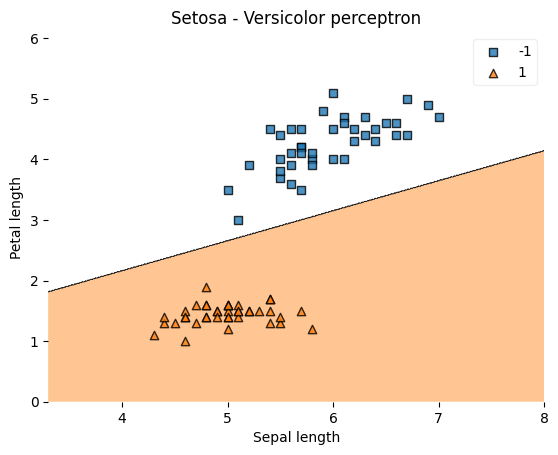

In [5]:
#lengths
ppn = Perceptron(epochs = 50, eta =0.001)
ppn.train(X_train, y_train)

plot_decision_regions(X_train, y_train, clf=ppn)
plt.title("Setosa - Versicolor perceptron")
plt.ylabel("Petal length")
plt.xlabel("Sepal length")
plt.show()

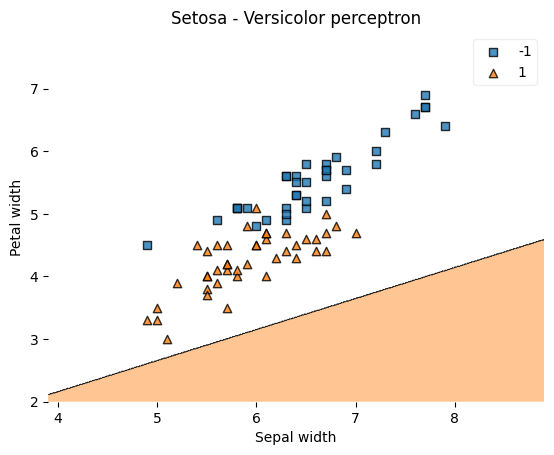

In [6]:
#widths
ppn_rev=Perceptron(epochs=50, eta=0.001)
ppn_rev.train(X_train_rev,y_train_rev)

plot_decision_regions(X_train_rev, y_train_rev, clf=ppn)
plt.title("Setosa - Versicolor perceptron")
plt.ylabel("Petal width")
plt.xlabel("Sepal width")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

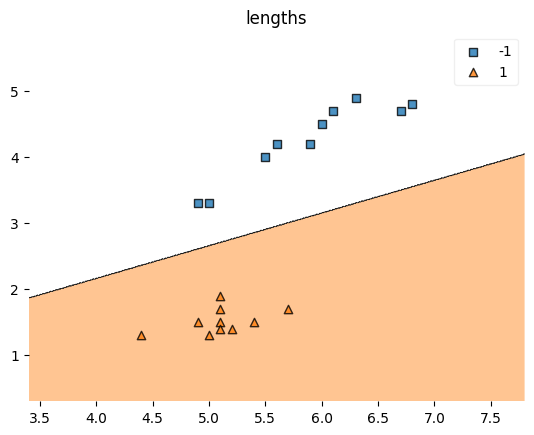

In [7]:
plot_decision_regions(X_test, y_test, clf=ppn)
plt.title("lengths")
plt.show


total number of misclassifications: 0 out of 20
total number of misclassifications: 7 out of 20
---


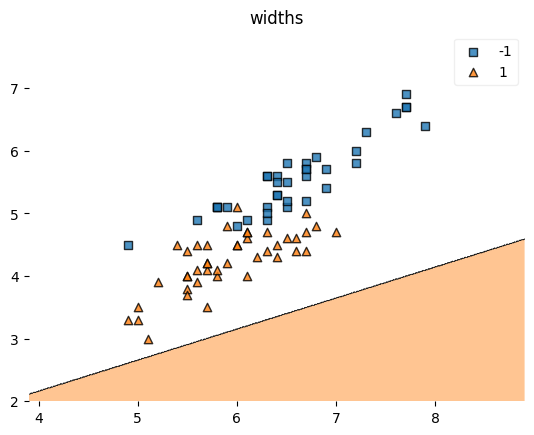

In [8]:
plot_decision_regions(X_train_rev,y_train_rev, clf=ppn)
plt.title("widths")
plt.show

print(f"total number of misclassifications: {(y_test!= ppn.predict(X_test)).sum()} out of {len(y_test)}")
print(f"total number of misclassifications: {(y_test_rev!= ppn.predict(X_test_rev)).sum()} out of {len(y_test_rev)}")
print("---")

In [9]:
#adaline
X_std=np.copy(X)
X_std[:,0]= (X[:,0]-X[:,0].mean())/ X[:,0].std()
X_std[:,1]=(X[:,1]-X[:,1].mean()/X[:,1].std())
X_std_train, X_std_test,y_std_train, y_std_test = train_test_split(X_std,y,test_size=0.2)

X_std_rev = np.copy(X_rev)
X_std_rev[:,0] = (X_rev[:,0] - X_rev[:,0].mean()) / X_rev[:,0].std() 
X_std_rev[:,1] = (X_rev[:,1] - X_rev[:,1].mean()) / X_rev[:,1].std()
X_std_train_rev, X_std_test_rev, y_std_train_rev, y_std_test_rev = train_test_split(X_std_rev, y, test_size=0.20)

In [10]:
ada = AdalineGD(epochs=50, eta=0.01)
ada.train(X_std_train, y_std_train)

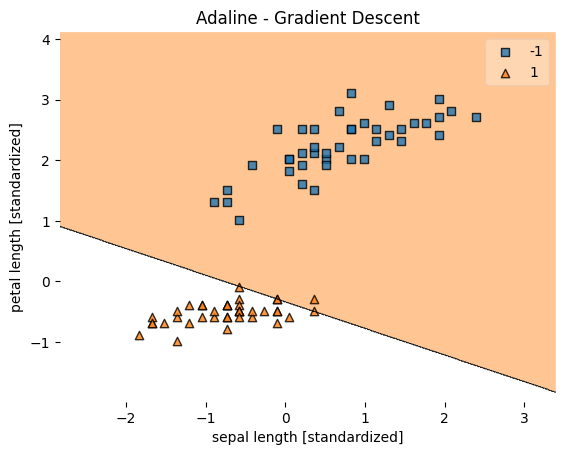

In [11]:
plot_decision_regions (X_std_train, y_std_train, clf=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.show()


In [12]:
ada_rev = AdalineGD(epochs=50, eta=0.01)
ada_rev.train(X_std_train_rev, y_std_train_rev)

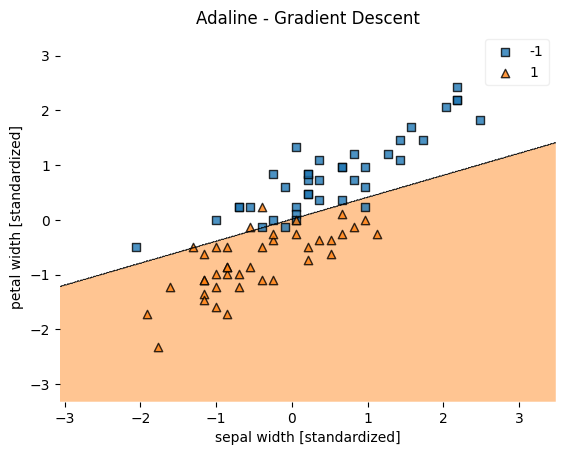

In [13]:
plot_decision_regions (X_std_train_rev, y_std_train_rev, clf=ada_rev)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal width [standardized]')
plt.ylabel('petal width [standardized]')
plt.show()

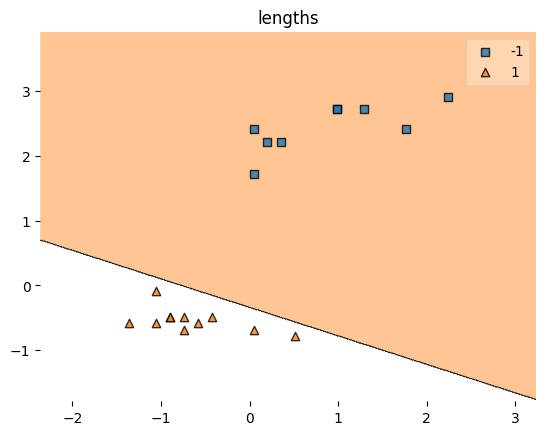

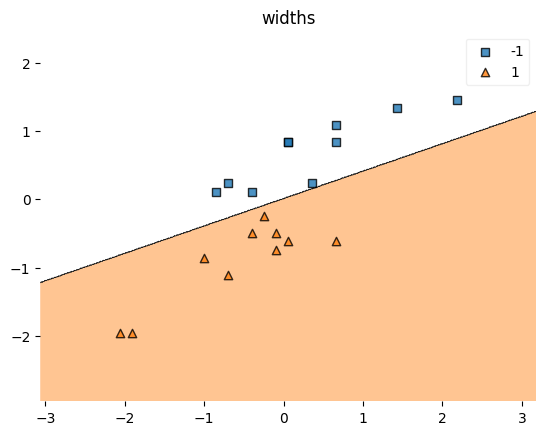

Total number of misclassifications: 20 out of 20
Total number of misclassifications: 19 out of 20
---


In [14]:
#Wyniki dla Adaline
plot_decision_regions (X_std_test, y_std_test, clf=ada)
plt.title("lengths")
plt.show()
plot_decision_regions (X_std_test_rev, y_std_test_rev, clf=ada_rev)
plt.title("widths")
plt.show()
print(f"Total number of misclassifications: {(y_std_test != ada.predict(X_std_test)).sum()} out of {len(y_std_test)}")
print(f"Total number of misclassifications: {(y_std_test_rev != ada.predict(X_std_test_rev)).sum()} out of {len(y_std_test_rev)}")
print("---")

In [15]:
#3 klasy perceptron
y_data = iris.iloc[0:150, 4].values
y_seto = np.where(y_data == 'Iris-setosa', 1, -1)
y_virg = np.where(y_data == 'Iris-virginica', 1, -1)
y_vers = np.where(y_data == 'Iris-versicolor', 1, -1) 
# sepal length and petal length
X_data = iris.iloc[0:150, [0, 1, 2, 3]].values
X_seto_train, X_seto_test, y_seto_train, y_seto_test = train_test_split(X_data, y_seto, test_size=0.20)
X_virg_train, X_virg_test, y_virg_train, y_virg_test = train_test_split(X_data, y_virg, test_size=0.20)
X_vers_train, X_vers_test, y_vers_train, y_vers_test = train_test_split(X_data, y_vers, test_size=0.20) #dla klasy Setosa
ppn_seto = Perceptron(epochs=50, eta=0.001)
ppn_seto.train(X_seto_train, y_seto_train)

print(f"Total number of misclassifications: {(y_seto_test != ppn_seto.predict(X_seto_test)).sum()} out of {len(y_seto_test)}")

Total number of misclassifications: 0 out of 30


In [16]:
# dla klasy Virginica
ppn_virg = Perceptron(epochs=50, eta=0.001)
ppn_virg.train(X_virg_train, y_virg_train)


print(f"Total number of misclassifications: {(y_virg_test != ppn_virg.predict(X_virg_test)).sum()} out of {len(y_virg_test)}")

Total number of misclassifications: 0 out of 30


In [17]:
# dla klasy Versicolor
ppn_vers = Perceptron(epochs=50, eta=0.01)
ppn_vers.train(X_vers_train, y_vers_train)

print(f"Total number of misclassifications: {(y_vers_test != ppn_vers.predict(X_vers_test)).sum()} out of {len(y_vers_test)}")
print("")

Total number of misclassifications: 7 out of 30



In [18]:
#3klasy dla Adaline
# sepal length and petal length
X_data =  iris.iloc[0:150, [0, 1, 2, 3]].values
X_std = np.copy(X_data)
X_std[:,0] = (X_data[:,0] - X_data[:,0].mean()) / X_data[:,0].std() 
X_std[:,1] = (X_data[:,1] - X_data[:,1].mean()) / X_data[:,1].std()
y_seto = np.where(y_data == 'Iris-setosa', 1, -1) 
y_virg= np.where(y_data == 'Iris-virginica', 1, -1)
y_vers = np.where(y_data == 'Iris-versicolor', 1, -1)
X_seto_train, X_seto_test, y_seto_train, y_seto_test = train_test_split(X_std, y_seto, test_size=0.20, shuffle = 4) 
X_virg_train, X_virg_test, y_virg_train, y_virg_test = train_test_split(X_std, y_virg, test_size=0.20, shuffle = 4) 
X_vers_train, X_vers_test, y_vers_train, y_vers_test = train_test_split(X_std, y_vers, test_size=0.20, shuffle = 4)

In [19]:
#setosa
ada = AdalineGD (epochs=50, eta=0.01) 
ada.train(X_seto_train, y_seto_train)

print(f"Total number of misclassifications: {(y_seto_test != ada.predict(X_seto_test)).sum()} out of {len(y_seto_test)}")

Total number of misclassifications: 21 out of 30


In [20]:
#virginica
ada = AdalineGD (epochs=50, eta=0.01)
ada.train(X_virg_train, y_virg_train)


print(f"Total number of misclassifications: {(y_virg_test != ada.predict(X_virg_test)).sum()} out of {len(y_virg_test)}")

Total number of misclassifications: 7 out of 30


In [21]:
#versicolor
ada = AdalineGD (epochs=50, eta=0.01) 
ada.train(X_vers_train, y_vers_train)

print(f"Total number of misclassifications: {(y_vers_test != ada.predict(X_vers_test)).sum()} out of {len(y_vers_test)}")
print("")

Total number of misclassifications: 23 out of 30



In [22]:
y_data = iris.iloc[0:150, 4].values
y_seto = np.where(y_data == 'Iris-setosa', 1, -1)
y_virg = np.where(y_data == 'Iris-virginica', 1, -1)
y_vers = np.where(y_data == 'Iris-versicolor', 1, -1)
ppn_acc1 = {"seto": 0, "virg": 0, "vers": 0}
ppn_acc2 = {"seto": 0, "virg": 0, "vers": 0}
ada_acc1 = {"seto": 0, "virg": 0, "vers": 0}
ada_acc2 = {"seto": 0, "virg": 0, "vers": 0}

In [23]:

# all possible data combinations
perm = [["Sepal length and sepal width",[0,1]],["petal length and petal width",[2,3]],["Sepal length-petal length",[0,2]], ["Sepal length and petal width",[0,3]], ["sepal width and petal length",[1,2]],["4DIM",[0,1,2,3]]]

#Perceptron
def ppn_run(y, eta = 0.01):
    accuracy = 0
    for each in perm:
        # sepal length and petal length
        X_data = iris.iloc[0:150, each[1]].values
        # Data for perceptron
        X_train, X_test , y_train, y_test = train_test_split(X_data, y, test_size=0.20)
        ppn = Perceptron (epochs=50, eta=eta)
        ppn.train(X_train, y_train)
        print(f"Perceptron total number of misclassifications for {each[0]}: {(y_test != ppn.predict(X_test)).sum()}")
        accuracy +=(y_test != ppn.predict(X_test)).sum()/len(y_test)
    print(f"Average accuracy Perceptron: {(len(perm)-accuracy)/len (perm)}")
    print("")
    return (len(perm)-accuracy)/len(perm)

In [24]:
ppn_acc1["seto"] = ppn_run(y_seto)
ppn_acc1["virg"] = ppn_run(y_virg)
ppn_acc1["vers"] = ppn_run(y_vers)

ppn_acc2["seto"] = ppn_run(y_seto, eta = 0.5)
ppn_acc2["virg"] = ppn_run(y_virg, eta = 0.5)
ppn_acc2["vers"] = ppn_run(y_vers, eta = 0.5)

Perceptron total number of misclassifications for Sepal length and sepal width: 1
Perceptron total number of misclassifications for petal length and petal width: 0
Perceptron total number of misclassifications for Sepal length-petal length: 0
Perceptron total number of misclassifications for Sepal length-petal width: 0
Perceptron total number of misclassifications for sepal width-petal length: 0
Perceptron total number of misclassifications for 4DIM: 0
Average accuracy Perceptron: 0.9944444444444445

Perceptron total number of misclassifications for Sepal length and sepal width: 6
Perceptron total number of misclassifications for petal length and petal width: 2
Perceptron total number of misclassifications for Sepal length-petal length: 1
Perceptron total number of misclassifications for Sepal length-petal width: 1
Perceptron total number of misclassifications for sepal width-petal length: 1
Perceptron total number of misclassifications for 4DIM: 0
Average accuracy Perceptron: 0.938888

In [25]:

#Adaline
def ada_run(y, eta = 0.01):
    accuracy = 0
    for each in perm:
        # sepal length and petal length
        X_data = iris.iloc[0:150, each[1]].values
        # standardized data for Adaline
        X_std= np.copy(X_data)
        
        X_std[:,0] = (X_data[:,0] - X_data[:,0].mean()) / X_data[:,0].std() 
        X_std[:,1] = (X_data[:,1] - X_data[:,1].mean()) / X_data[:,1].std()
        X_std_train, X_std_test, y_std_train, y_std_test = train_test_split(X_std, y, test_size=0.20, shuffle=4)
        ada = AdalineGD (epochs=50, eta=eta)
        ada.train(X_std_train, y_std_train)
        print(f"Adaline total number of misclassifications for {each[0]}: {(y_std_test != ada.predict(X_std_test)).sum() }")
        accuracy +=(y_std_test != ada.predict(X_std_test)).sum()/len(y_std_test)
    print (f"Average accuracy Adaline: {(len(perm)-accuracy)/len(perm)}")
    print("")
    return (len(perm)-accuracy)/len (perm)


In [26]:
ada_acc1["seto"] = ada_run(y_seto)
ada_acc1["virg"] = ada_run(y_virg) 
ada_acc1["vers"] = ada_run(y_vers)

ada_acc2["seto"] = ada_run(y_seto, eta = 0.5)
ada_acc2["virg"] = ada_run(y_virg, eta = 0.5) 
ada_acc2["vers"] = ada_run(y_vers, eta = 0.5)

Adaline total number of misclassifications for Sepal length and sepal width: 0
Adaline total number of misclassifications for petal length and petal width: 28
Adaline total number of misclassifications for Sepal length-petal length: 24
Adaline total number of misclassifications for Sepal length-petal width: 24
Adaline total number of misclassifications for sepal width-petal length: 0
Adaline total number of misclassifications for 4DIM: 21
Average accuracy Adaline: 0.4611111111111111

Adaline total number of misclassifications for Sepal length and sepal width: 4
Adaline total number of misclassifications for petal length and petal width: 24
Adaline total number of misclassifications for Sepal length-petal length: 25
Adaline total number of misclassifications for Sepal length-petal width: 21
Adaline total number of misclassifications for sepal width-petal length: 2
Adaline total number of misclassifications for 4DIM: 8
Average accuracy Adaline: 0.5333333333333333

Adaline total number of